## 1) Exploração do conjunto de dados

O conjunto de dados "Aula 18 - dataset.csv" possui algumas características peculiares a serem consideradas:

. Possui 5 colunas de features, as quais possuem valores númericos, e 1 coluna de label, a qual possui como conteúdo 0 ou 1.

. Há alguns espaços em branco na segunda coluna, os quais serão preenchidos com um número 0, pelos outros dados serem númericos.

. Tirando a primeira linha que nomeia as colunas, há 891 linhas de dados no total, com repetição de linhas.

. A quinta coluna é a que tem os valores com maior desvio-padrão, sendo uma das que mais vão interferir no cálculo da distância euclidiana. Porém, optarei por mantê-la do jeito que está.

## 2) Pré-processamento






. Input do arquivo CSV e dos k que serão calculados;

In [3]:
df = input("Digite o arquivo CSV (com o .csv): ")
passo = int(input("De quanto em quanto o K alternará: "))
k_inicial = int(input("Valor inicial de K: "))
k_final = int(input("Valor final de K: "))

. Leitura do arquivo utilizando a função **readlines** e exclusão da linha de cabeçalho;

In [5]:
with open(df, "r") as arq:
    dataset = arq.readlines()

dataset.pop(0)

FileNotFoundError: [Errno 2] No such file or directory: 'Aula 18 - dataset.csv'

. Mudança das linhas do arquivo de string para listas a partir do ";" e adição de zeros nos valores vazios;

In [ ]:
for i, linha in enumerate(dataset):
      linha = linha.strip().split(";")
      dataset[i] = linha

      for j in range(len(linha)):
          if linha[j] == "":
                linha[j] = "0"

      dataset[i] = linha

. Exclusão de linhas duplicadas que tem labels dferentes ou não

In [ ]:
import copy


exclui_duplicatas = copy.deepcopy(dataset)
for linha in exclui_duplicatas:
    cont = 0
    linha_sem_label = linha[:-1]

    for line in dataset:
        line_sem_label = line[:-1]

        if linha_sem_label == line_sem_label:
            cont += 1

    if cont > 1:
        dataset_temp = []
        cont_removido = 0

        for line in dataset:
            line_sem_label = line[:-1]

            if linha_sem_label == line_sem_label:
                if cont_removido == 0:
                    dataset_temp.append(line)
                    cont_removido += 1
                else:
                    cont -= 1
            else:
                dataset_temp.append(line)

        dataset = dataset_temp

. Embaralhamento das linhas do dataset e separação delas em 9 grupos de amostras os quais serão guardados na variável **amostras**.


In [ ]:
import random


labels_teste, amostras = [], []
qtd_grupo, inicio, cont = round((len(dataset) / 9)), 0, 9
fim = qtd_grupo


random.shuffle(dataset)
while cont > 0:
      amostras.append([dataset[j] for j in range(inicio, fim)])
      inicio += qtd_grupo
      fim += qtd_grupo
      cont -= 1

. Criação de uma matriz com todos os labels das amostras

In [ ]:
for grupo in amostras:
      labels_teste.append([linha[-1] for linha in grupo])

## 3) Experimento



. Técnica de amostragem Hold-out, sem reposição

. Técnica de reamostragem Validação cruzada com k partições (k-fold cross validation),

In [ ]:
from mateus_goncalves_2000 import knn

acuracias = {}
media = {}
for k in range(k_inicial, k_final+1, passo):
      order, acuracia = 0, []


      while order != len(amostras):
            amostra_treino = []
            for i, grupo in enumerate(amostras):
                if i == order:
                    sem_label = copy.deepcopy(grupo)
                    for linha in sem_label:
                        linha.pop(-1)
                    amostra_teste = sem_label


                else:
                    for linha in grupo:
                        amostra_treino.append(linha)


            labels_knn = knn(k, amostra_treino, amostra_teste)


            acertos = 0
            for i in range(len(labels_teste[order])):
                  if labels_teste[order][i] == labels_knn[i]:
                      acertos += 1


            porcentagem_acertos = (acertos / len(labels_teste[order])) * 100
            acuracia.append(round(porcentagem_acertos, 2))


            order += 1


      media[f"k = {k}"] = round(sum(acuracia)/len(acuracia))
      acuracias[f"k = {k}"] = acuracia

## 4) Resultados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_acuracias = pd.DataFrame(acuracias)
df_acuracias.index = [f"{col + 1}ª iteração" for col in df_acuracias.index]

df_medias = pd.DataFrame([media])
df_medias = df_medias.T
df_medias = df_medias.rename(columns={0: "Media em %"})

### Tabela e gráfico das acuracias de cada k

Tabela:

In [ ]:
df_acuracias

,k = 3,k = 4,k = 5,k = 6,k = 7,k = 8
1ª iteração,58.02,60.49,62.96,64.20,62.96,65.43
2ª iteração,67.90,62.96,67.90,70.37,74.07,72.84
3ª iteração,61.73,61.73,60.49,59.26,64.20,61.73
4ª iteração,62.96,59.26,60.49,59.26,62.96,64.20
5ª iteração,69.14,66.67,70.37,70.37,69.14,70.37
6ª iteração,62.96,65.43,66.67,67.90,62.96,65.43
7ª iteração,62.96,60.49,65.43,65.43,65.43,61.73
8ª iteração,64.20,60.49,66.67,62.96,67.90,62.96
9ª iteração,70.37,67.90,72.84,74.07,71.60,69.14


Gráficos:

In [ ]:
df_acuracias.index = [f"{col + 1}ª" for col in range(0, len(amostras))]

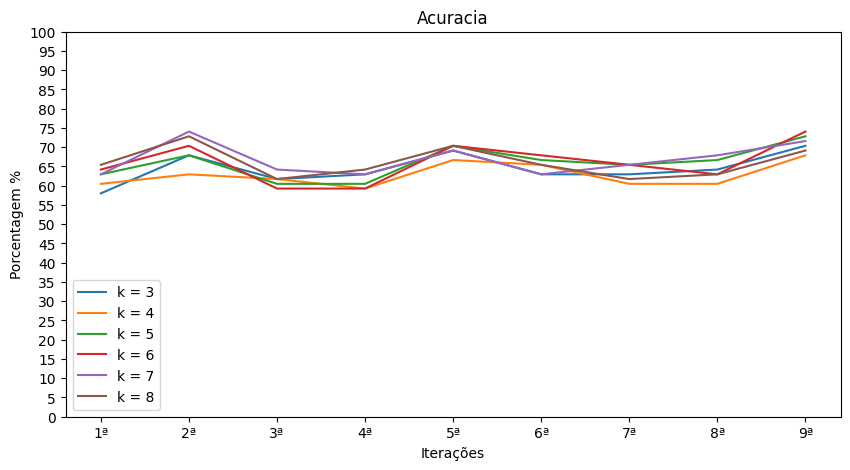

In [ ]:
df_acuracias.plot(kind = 'line', xlabel = "Iterações", ylabel = "Porcentagem %", figsize = (10,5), title = "Acuracia")
plt.yticks(range(0, 101, 5))
plt.xticks(range(0, 9))
plt.show()


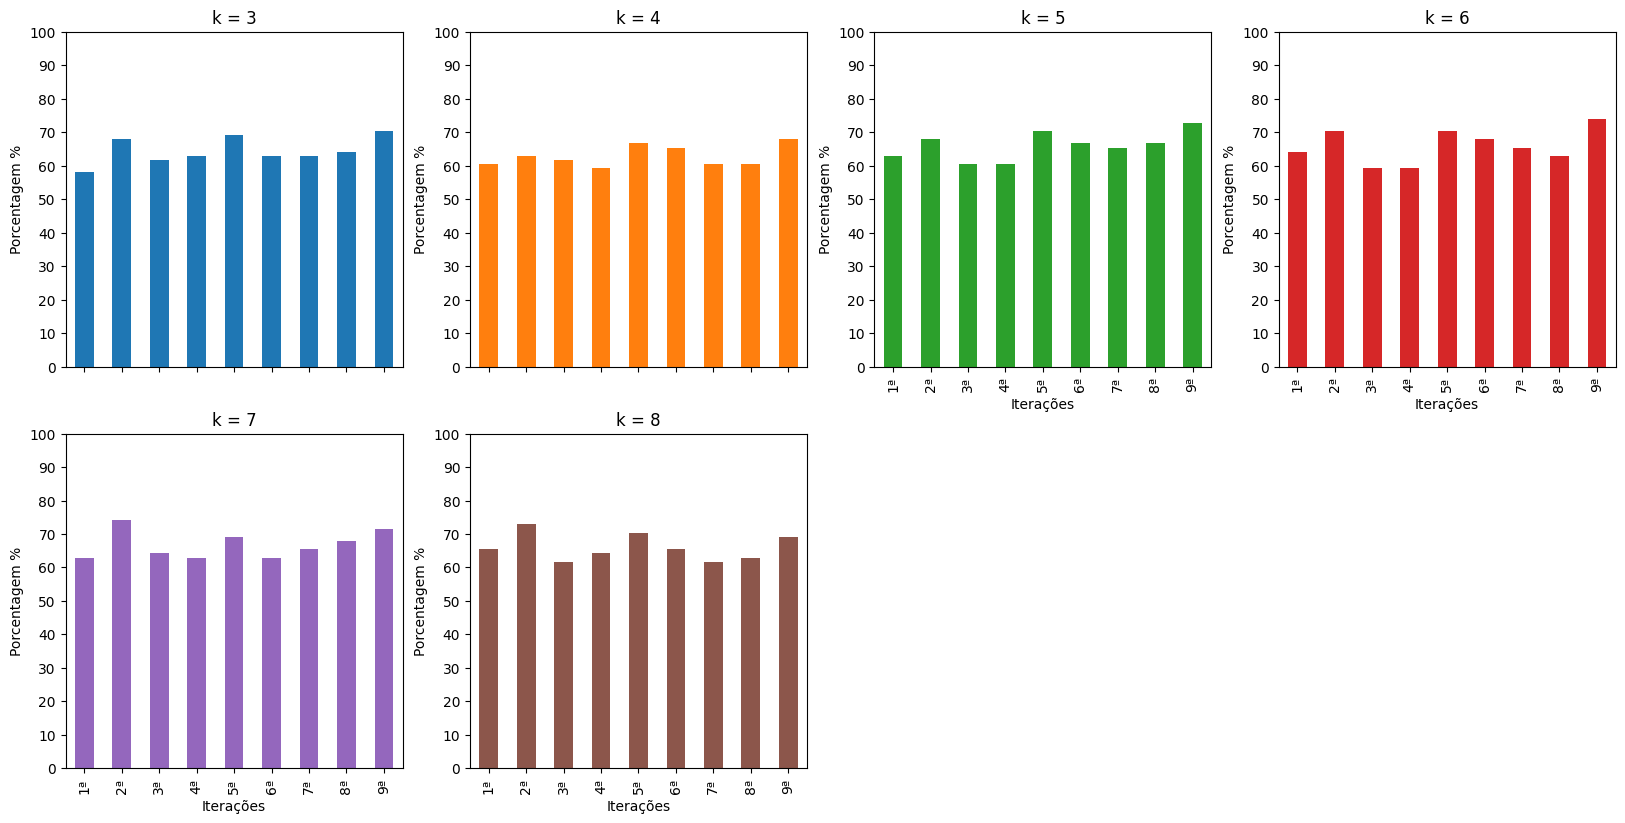

In [ ]:
df_acuracias.plot(kind = "bar", subplots = True, layout = (4, 4), xlabel = "Iterações", ylabel = "Porcentagem %", figsize = (20,20), legend = False, yticks= range(0, 101, 10))
plt.xticks(rotation=0)
plt.yticks()
plt.show()

<Axes: xlabel='Iterações', ylabel='Porcentagem %'>

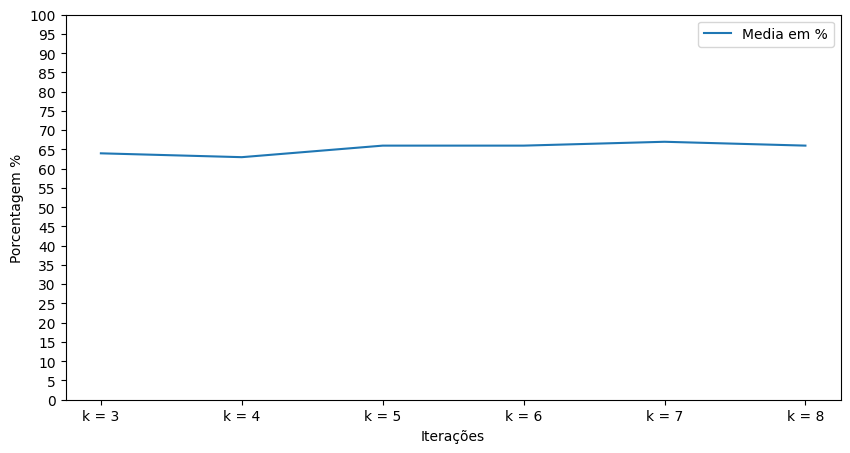

In [ ]:
grafico = df_medias.plot(kind = 'line', xlabel = "Iterações", ylabel = "Porcentagem %", figsize = (10,5), title = "")
plt.yticks(range(0, 101, 5))
plt.xticks(range(0, len(media), 1))
grafico

### Tabela da média das acurácias de cada k

In [ ]:
df_medias

,Media em %
k = 3,64
k = 4,63
k = 5,66
k = 6,66
k = 7,67
k = 8,66


Gráfico:

<Axes: title={'center': 'Media'}, ylabel='Porcentagem %'>

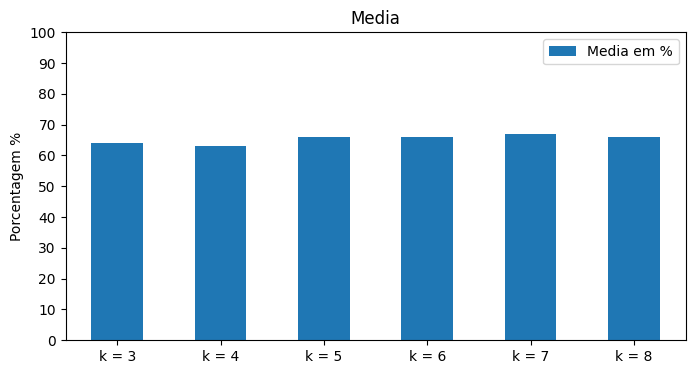

In [ ]:
grafico = df_medias.plot(kind = 'bar', ylabel = "Porcentagem %", figsize = (8,4), title = "Media")
plt.xticks(rotation = 0)
plt.yticks(range(0, 101, 10))
grafico


### 5) Conclusão

Melhor ou um dos melhores valores médios de k:

In [ ]:
df = df_medias.loc[df_medias["Media em %"].idxmax()]
df


,k = 7
Media em %,67
